### TreefortBnB Prices Data Visualization Notebook

Link to data and description: https://priceonomics.com/the-priceonomics-data-puzzle-treefortbnb/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set plotting parameters
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 30)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
# plt.rcParams['text.usetex'] = True
plt.rcParams.update({'axes.titlesize': '35'})
plt.style.use('fivethirtyeight')

In [3]:
# load dataset
df = pd.read_csv('treefortbnb_data.csv')

In [4]:
# clean up col names
df.columns = ['id', 'city', 'state', 'price', 'num_reviews']
df.head()

,id,city,state,price,num_reviews
0,1,Portland,OR,75,5
1,2,San Diego,CA,95,3
2,3,New York,NY,149,37
3,4,Los Angeles,CA,199,45
4,5,Denver,CO,56,99


In [5]:
df.shape

(42802, 5)

In [6]:
# check for duplicates
df[df.duplicated(subset=['city', 'state', 'price', 'num_reviews'])]

,id,city,state,price,num_reviews
128,129,Brooklyn,NY,180,3
161,162,Seattle,WA,65,99
194,195,Seattle,WA,65,99
246,247,New York,NY,249,10
281,282,New York,NY,195,4
...,...,...,...,...,...
42797,42798,Los Angeles,CA,87,0
42798,42799,Los Angeles,CA,110,0
42799,42800,San Francisco,CA,148,0
42800,42801,San Francisco,CA,84,0


Because there are so many duplicate combinations of city, state, price, and reviews, I will take the unique id column at face value and assume there are not duplicates in the dataset. 

In [7]:
# fix uppercase issue (e.g. miami vs. Miami)
df['city'] = df['city'].apply(lambda x: x.lower())
df['city'] = df['city'].apply(lambda x: x.lower())

In [8]:
# create city_state column
def clean_row(row): 
    return row['city'].title() + ', ' + row['state']

df['city_state'] = df.apply(clean_row, axis=1)

In [9]:
# get median list price and number of listings by city
# get prices for top 100 cities based on number of listings
df_sorted = df.groupby('city_state')['price'].agg(['median', 'count']).reset_index().sort_values(by=['count', 'median'], ascending=False)[:100].sort_values(by=['median'], ascending=False)

In [10]:
# create dataframe for plotting
df_sorted.columns = ['city', 'median_list_price', 'count']
df_sorted['median_list_price'] = df_sorted['median_list_price'].apply(lambda x: int(x))

In [11]:
# add column to dataframe for easy labeling
def tup(row):
    return (row['median_list_price'], row['count'])

df_sorted['tup'] = df_sorted.apply(tup, axis=1)

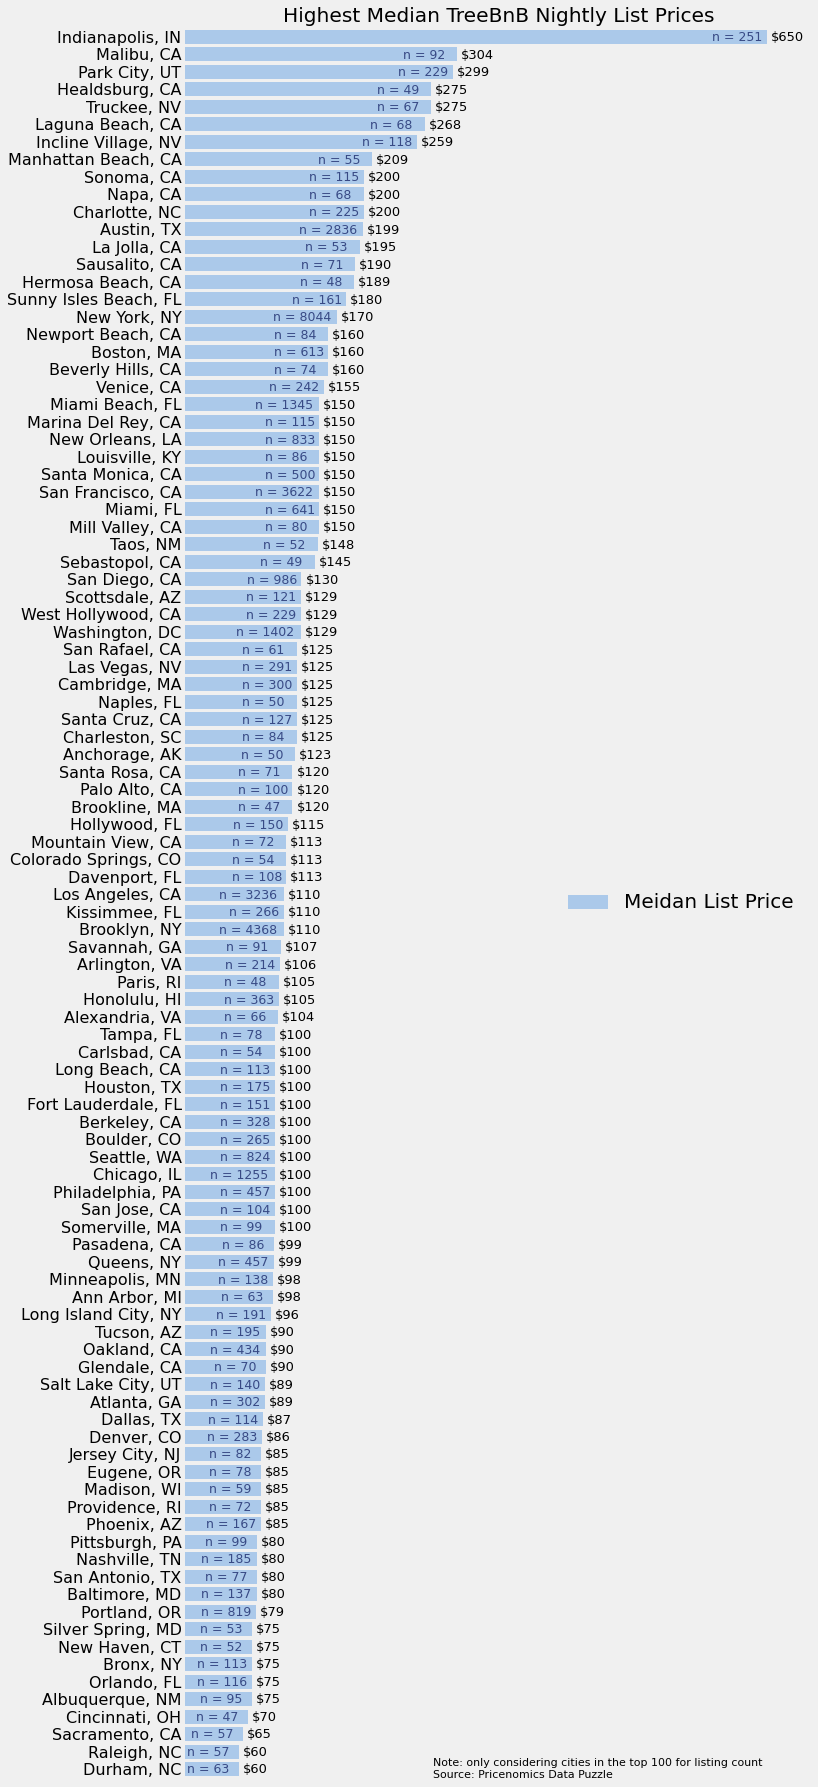

In [12]:
# initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 30))

# plot the mediam prices
sns.set_color_codes('pastel')
sns.barplot(x='median_list_price', y='city', data=df_sorted[:100], label='Meidan List Price', color='b')

# add a legend and remove tick labels
ax.legend(ncol=2, loc='center right', frameon=False)
ax.set(xlim=(0, 700), ylabel='', xlabel='')
ax.get_xaxis().set_visible(False)
sns.despine(left=True, bottom=True)

# add text labels
for ix, val in enumerate(df_sorted['tup'][:100]):
    plt.text(val[0] + 4.5, ix + .25, '$'+str(val[0]), fontsize=13)
    if len(str(val[1])) > 3:
        plt.text(val[0] - 72, ix + .25, 'n = '+str(val[1]), fontsize=12.5, color='#384a85')
    elif val[0] < 100 and len(str(val[1])) == 3:
        plt.text(val[0] - 61.7, ix + .25, 'n = '+str(val[1]), fontsize=12.5, color='#384a85')
    elif val[0] < 100 and len(str(val[1])) < 3:
        plt.text(val[0] - 58, ix + .25, 'n = '+str(val[1]), fontsize=12.5, color='#384a85')
    else:
        plt.text(val[0] - 61, ix + .25, 'n = '+str(val[1]), fontsize=12.5, color='#384a85')

# add title and save output
plt.title('Highest Median TreeBnB Nightly List Prices')
plt.figtext(0.425, 0.07, 'Note: only considering cities in the top 100 for listing count\nSource: Pricenomics Data Puzzle',
            fontsize=11)
plt.savefig('treebnb.png', dpi=300, bbox_inches = 'tight')